<a href="https://colab.research.google.com/github/dearsanshui/data_exploration/blob/main/Split_photo_into_9_squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to use python module **[pillow](https://pillow.readthedocs.io/en/stable/)** to transform your picture into 9squares

In [1]:
import PIL
from PIL import Image
from IPython.display import display
from google.colab import files
import random

The idea would be to split the image into 9 sub-images, then concate those 9 images together.
Besides, we could also change the style of each image a little bit.

In [2]:
def splitImage(image):
  """split the image into 9 squares.
    
    Arguments:
    image -- the image to split
    
    Returns:
    images -- a list of 9 sub-images
    """
  images = list()
  offset_w = int(image.width / 3)
  offset_h = int(image.height / 3)

  for i in range(0,3):
    for j in range(0,3):
      im = image.crop((i*offset_w, j*offset_h, (i+1)*offset_w, (j+1)*offset_h))
      images.append(im)

  return images

In [3]:
def concatImages(image_lst):
  """
    concat a list of images into a big image
    
    Arguments:
    image_lst -- a list of images
    
    Returns:
    image -- an image object
  """ 

  image_space = 6
  space_color = 'white'

  first_image = image_lst[0]
  image = Image.new(first_image.mode, (first_image.width*3 + 2 * image_space, first_image.height*3 + 2 * image_space), space_color)
  x=0
  y=0
  for im in image_lst:
    image.paste(im, (x, y))
    # Update Y position. If it is going to be the height of the image, then we set it to 0 and update X
    # The first three images in the list represent the images in the first column of the new image
    if y + first_image.height == image.height:
      y = 0
      x = x + first_image.width + image_space
    else:
      y = y + first_image.height + image_space

  return image

In [4]:
def stylizeImages(image_lst):
  """
    Modify the style of images. Basically, we will randomly modify the channel intensity of each image.

    Arguments:
    image_lst -- a list of images
    
    Returns:
    s_image_lst -- a list of images with new style
  """

  channels = (0, 1, 2)
  s_image_lst = list()

  for image in image_lst:
    image = image.convert('RGB')
    c = random.choice(channels)
    intensity_rate = round(random.uniform(0.5, 0.9), 2)
    source = image.split()
    channel_lst = list(source)
    channel_lst[c] = channel_lst[c].point(lambda pixel: pixel * intensity_rate)
    s_image_lst.append(Image.merge(image.mode, tuple(channel_lst)))

  return s_image_lst

The original image:


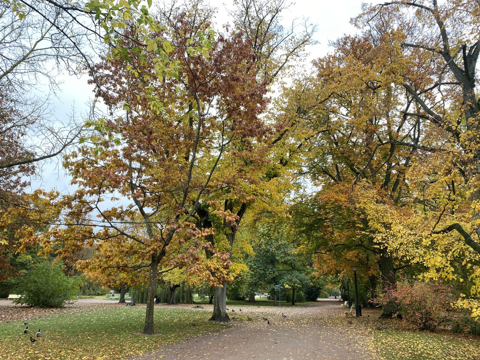

The 9squared image:


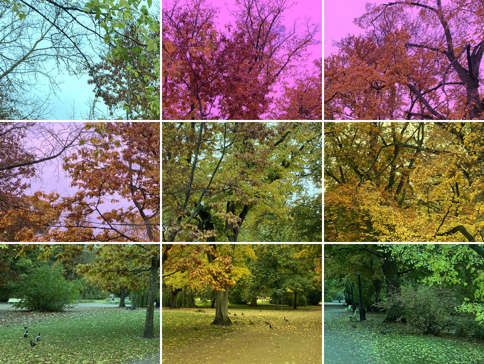

In [5]:
#uploaded = files.upload()
#image_path = list(uploaded.keys())[0]
image_path = "autumn.jpg"
image = Image.open(image_path)

print("The original image:")
# since the original picture used is quite large, in order to display in a more 
# perceivalbe scale, we resize the image as 1/3 of its previous size
display(image.resize((int(image.width/3),int(image.height/3))))

splitted_images = splitImage(image)

stylized_images = stylizeImages(splitted_images)

new_image = concatImages(stylized_images)
print("The 9squared image:")
display(new_image.resize((int(new_image.width/3),int(new_image.height/3))))


# New Section